# Human Cell Lines

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

In [2]:
adata = cr.read('../../out/cell-lines/adata_no_doublets_02.h5ad')


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


In [3]:
adata

AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff', 'score'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_

In [4]:
X_magic = cr.read('../../out/cell-lines/X_magic_no_doublets_02.h5ad')
X_magic

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


AnnData object with n_obs × n_vars = 13945 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_cou

In [5]:
adata.layers['imputed'] = X_magic.X
adata.obsm['X_pca_imputed'] = X_magic.obsm['X_pca']

In [6]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')

# Subtyping with Archetype Signatures

In [2]:
adata = cr.read('../../out/cell-lines/adata_03.h5ad')

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


## Using Mazebox to generate archetype scores

In [3]:
sig_matrix = pd.read_csv('../../out/bulk/sig_matrix_ParTI_2021.csv', header =0, index_col = 0)

sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)


In [4]:
# import seaborn as sns
# max_subtype = []
# max_v = []
# sig_matrix_copy = sig_matrix.copy()
# for i,r in sig_matrix.iterrows():
#     maxi = r.idxmax()
#     maxv = r.max()
#     max_subtype.append(maxi) 
#     max_v.append(maxv)
# sig_matrix_copy['max_subtype'] = max_subtype
# sig_matrix_copy['max'] = max_v

# plt.figure(figsize=(5,30))
# sig_matrix_copy = sig_matrix_copy.sort_values(by = ['max_subtype','max'], ascending=[True, False])
# sig_matrix_copy = sig_matrix_copy[['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y']]
# sns.heatmap(sig_matrix_copy, cmap='viridis', yticklabels = True)
# plt.xticks(rotation = 90)
# plt.title(f'Log-transformed Archetype Expression Profiles')
# plt.tight_layout()
# # plt.savefig(op.join(outdir,f'figures/Archetypes/sig_matrix_logfc.pdf'))
# plt.show()
# plt.close()

# sig_matrix_copy.to_csv('../data/sig_matrix_ParTI.csv')

If the below code gives an error about data shape, use `type = 'csr'`.

Cells with zero expression for all genes in gene signature will get scores of NaN when assigning scores in adata.obs (because these cells are filtered for the calculation). 

Trying to set attribute `.obs` of view, copying.


Transforming tumor data...
Gene signature matrix now has shape:  (99, 5)
Tumor data shortened to genes in gene list...
(13883, 99)
Tumor data subsetting complete.


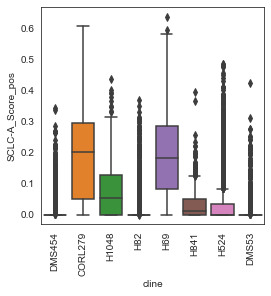

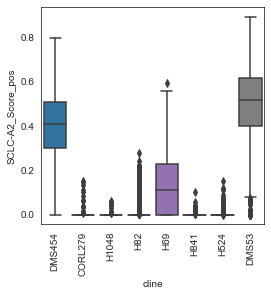

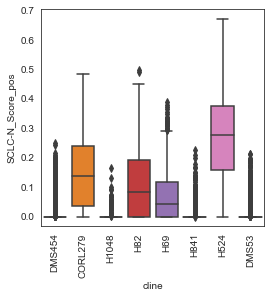

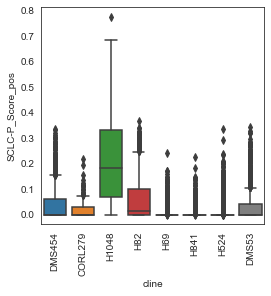

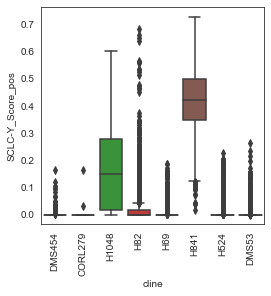

In [5]:
adata, adata_small, sig_matrix2 = mb.ar.phenotyping_recipe(adata, sig_matrix, groupby = 'cline',velocity=False)


In [6]:
from sklearn.manifold import LocallyLinearEmbedding
def _archetype_diagram_no_arrows(_adata, score_name, color, figsize, order, multiplier,fname,
                                 sizes = None, alpha = .3, s = 30, color_dict = None, norm = 'scale'):
    # X = subtype scores for each subtype (pd dataframe)
    n_samples = len(_adata.obs_names)

    n_types = len(sig_matrix.columns)
    subtypes = sig_matrix.columns
    X = _adata.obs[[f"{x}{score_name}" for x in subtypes]]
    top = X.sum().sort_values(ascending=False)[:3]  # return a list of n largest element
    print(top.index)

    # normalize X to sum to 1 (makes sure that the data fits within the archetype diagram with I matrix = vertices
    X_norm = pd.DataFrame(columns=X.columns)
    if norm == 'scale':
        for i, r in X.iterrows():
            if r.sum() == 0:
                X_norm = X_norm.append(r)
            else:
                X_norm = X_norm.append(r / r.sum())
    elif norm == 'max':
        max = X.max().max()
        X_norm = X / max
    elif norm == 'None':
        X_norm = X

    X = X_norm.fillna(0)
    if type(order) != type(None):
        X = X[[f"{x}{score_name}" for x in order]]
        subtypes = order
    else:
        order = subtypes

    ident = np.identity(n_types)
    for i, x in enumerate(subtypes):
        X = X.append(pd.DataFrame(np.array(ident[i]), index=X.columns, columns=[x]).T)

    embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=4, method='modified', eigen_solver='dense')
    X_transformed = embedding.fit_transform(X[-n_types:])
    X_transformed = X_transformed.T

    X_df_data = embedding.transform(X[:-n_types])
    X_df_data = X_df_data.T

    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    plt.scatter(X_df_data[0], X_df_data[1], c=c, zorder=1, alpha=alpha, s=s)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                zorder=2, s=sizes)
    plt.axis('tight')
    plt.savefig(f'./figures/{fname}.pdf')
    plt.show()
    plt.close()
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot()
    colors = _adata.obs[color].values
    if type(colors[0]) == str:
        c = [color_dict[i] for i in colors]
    else:
        c = colors
    sns.kdeplot(X_df_data[0], X_df_data[1], cmap="Reds", shade=True, bw=.15)
    if type(sizes) == int:
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    else:
        sizes = [Counter(colors)[i] * multiplier / n_samples for i in order]
        print(sizes)
        plt.scatter(X_transformed[0, -n_types:], X_transformed[1, -n_types:], c='black',
                    zorder=2, s=sizes)
    plt.axis('tight')
    plt.show()
    plt.close()


Index(['SCLC-A2_Score', 'SCLC-N_Score', 'SCLC-Y_Score'], dtype='object')


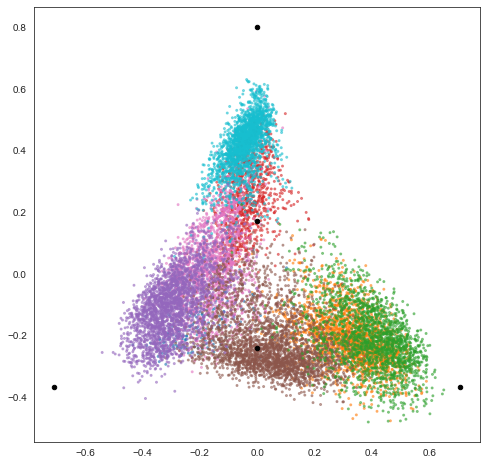

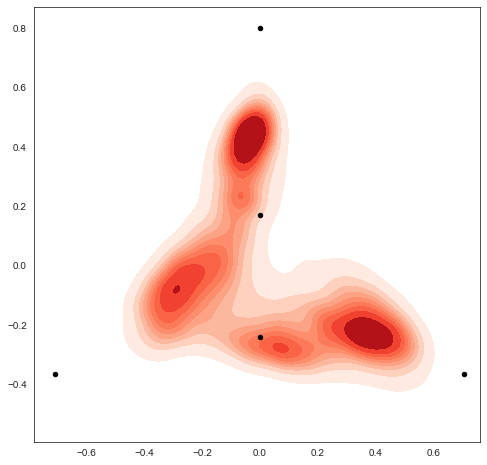

In [8]:
color_dict = {}
for i,c in enumerate(sorted(list(set(adata_small.obs['cline'])))):
    if i == 7:     color_dict[c] = sns.color_palette('tab10')[9] #skip grey
    else:
        color_dict[c] = sns.color_palette('tab10',8)[i]
cmap = 'jet'
_archetype_diagram_no_arrows(adata_small, color_dict=color_dict,color='cline',fname = 'cline_archetype_space',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',
                        multiplier=1, figsize=(8,8), score_name = '_Score', alpha = .5, s = 4, sizes = 20)


## Newer phenotype classification with labeled generalists
Let's check to see how many samples have significant scores (p>.3) for more than one phenotype.

<BarContainer object of 3 artists>

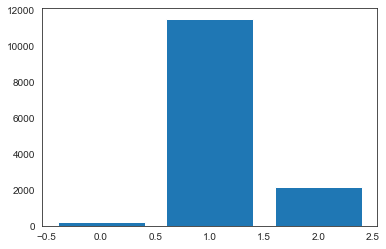

In [9]:
df = adata.obs[[f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']]]
# np.unique((df > .3).sum(axis = 1), return_counts=True)[1]
plt.bar(height = np.unique(((df.T/df.sum(axis = 1)).T > .33).sum(axis = 1), return_counts=True)[1], x = range(3), log=False)

In [10]:
arc_pheno = []
arc_aa_type = []

for i,r in df.iterrows():
    r = r/r.sum()
    if (r > .33).sum() > 1:
        arc_aa_type.append('Generalist')
        arc_pheno.append(r.sort_values(ascending=False)[0:2].sort_index().index[0].split('_')[0]+"_"+r.sort_values(ascending=False)[0:2].sort_index().index[1].split('_')[0])
    elif  (r > .33).sum() == 1:
        try:
            arc_aa_type.append(r.idxmax().split('_')[0]+" Specialist")
            arc_pheno.append(r.idxmax().split('_')[0])
        except AttributeError: 
            arc_aa_type.append("Unclassified")
            arc_pheno.append("Unclassified")
    else: 
        arc_aa_type.append("Unclassified")
        arc_pheno.append("Unclassified")
adata.obs['arc_pheno'] = arc_pheno
adata.obs['arc_aa_type'] = arc_aa_type


In [12]:
pd.crosstab(adata.obs['arc_pheno'],adata.obs['cline']).style.background_gradient(cmap='viridis')

cline,DMS454,CORL279,H1048,H82,H69,H841,H524,DMS53
arc_pheno,,,,,,,,
SCLC-A,33,88,30,121,1094,2,190,22
SCLC-A2,1722,1,0,2,637,0,0,1724
SCLC-A2_SCLC-A,49,0,0,0,483,0,0,24
SCLC-A2_SCLC-N,8,4,0,60,165,0,1,1
SCLC-A2_SCLC-P,159,0,1,0,5,0,0,51
SCLC-A2_SCLC-Y,2,0,0,0,0,0,0,12
SCLC-A_SCLC-N,1,51,0,22,206,0,156,0
SCLC-A_SCLC-P,6,5,38,42,5,0,5,2
SCLC-A_SCLC-Y,0,0,64,19,8,13,25,2


In [13]:
pd.crosstab( adata.obs['arc_pheno'],adata.obs['Phenotype']).style.background_gradient(cmap='viridis')

Phenotype,Generalist,None,SCLC-A,SCLC-A2,SCLC-N,SCLC-P,SCLC-Y
arc_pheno,,,,,,,
SCLC-A,1435,101,44,0,0,0,0
SCLC-A2,2509,33,0,1544,0,0,0
SCLC-A2_SCLC-A,544,12,0,0,0,0,0
SCLC-A2_SCLC-N,219,20,0,0,0,0,0
SCLC-A2_SCLC-P,211,5,0,0,0,0,0
SCLC-A2_SCLC-Y,14,0,0,0,0,0,0
SCLC-A_SCLC-N,411,25,0,0,0,0,0
SCLC-A_SCLC-P,86,17,0,0,0,0,0
SCLC-A_SCLC-Y,127,4,0,0,0,0,0


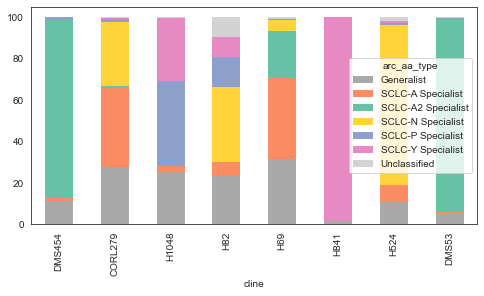

In [14]:
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y Specialist': cp[4], 'SCLC-A Specialist': cp[0], 'SCLC-A2 Specialist': cp[1], 'SCLC-N Specialist': cp[2], 'SCLC-P Specialist': cp[3],
              'Generalist': 'darkgrey', 'Unclassified': 'lightgrey'}
mb.pl.subtype_bar(adata,groupby='cline', fname = 'cline', pheno_name="arc_aa_type", custom_palette=color_dict)

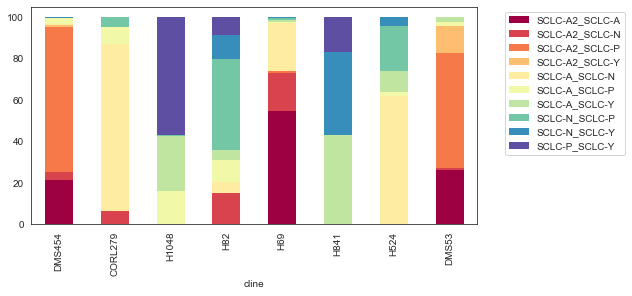

In [16]:
_adata = adata[adata.obs['arc_aa_type'] == 'Generalist']
plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).T /
  pd.crosstab(_adata.obs["cline"], _adata.obs['arc_pheno']).sum(axis=1)) * 100).T.plot(kind='bar',
                                                                                              stacked=True,
                                                                                              linewidth=0, cmap = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.savefig('./figures/arc_aa_generalist_subtypes.pdf')

In [18]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300
# mb.pl.archetype_diagrams(adata, sig_matrix, color_dict=color_dict, groupby='cline',color = 'arc_aa_type',
#                         order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',sizes = 20,
#                         figsize=(4,4), score_name = '_Score', alpha = .8, s = 8, arrows = False)


In [19]:
np.unique(adata.obs['arc_pheno'], return_counts=True)

(array(['SCLC-A', 'SCLC-A2', 'SCLC-A2_SCLC-A', 'SCLC-A2_SCLC-N',
        'SCLC-A2_SCLC-P', 'SCLC-A2_SCLC-Y', 'SCLC-A_SCLC-N',
        'SCLC-A_SCLC-P', 'SCLC-A_SCLC-Y', 'SCLC-N', 'SCLC-N_SCLC-P',
        'SCLC-N_SCLC-Y', 'SCLC-P', 'SCLC-P_SCLC-Y', 'SCLC-Y',
        'Unclassified'], dtype=object),
 array([1580, 4086,  556,  239,  216,   14,  436,  103,  131, 2654,  242,
          73,  706,  174, 2499,  236]))

In [20]:
adata.write_h5ad('../../out/cell-lines/adata_03.h5ad')



... storing 'Phenotype' as categorical
... storing 'arc_pheno' as categorical
... storing 'arc_aa_type' as categorical


# ParetoTI S Matrix
1. ParetoTI: fit_pch gives an S matrix for each archetype. Take a look at these values. Maybe try a Gaussian model on these values?
2. We could also do a test where we see if each bulk archetype is enriched for S values for each archetype, and if significant, align the archetypes that way. 
3. Try doing a CAP plot for the S matrix and for the GMM-transformed S matrix


In [2]:
adata = sc.read_h5ad('../../out/cell-lines/adata_03.h5ad')


In [3]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_no_doublets_02.h5ad')

In [6]:
S_matrix = pd.read_csv('../../out/cell-lines/ParetoTI/S.csv', index_col=0)

In [7]:
S_matrix

,V1,V2,V3,V4
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454,0.000000,0.000000,0.032414,0.967586
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454,0.055279,0.021827,0.019238,0.903656
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454,0.000000,0.000000,0.001771,0.998229
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454,0.002177,0.000000,0.029311,0.968512
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454,0.024857,0.000000,0.051511,0.923632
...,...,...,...,...
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53,0.000000,0.017434,0.000000,0.982566
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53,0.019051,0.009651,0.000000,0.971298
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53,0.000000,0.000000,0.000000,1.000000
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53,0.000000,0.119223,0.000000,0.880777


computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


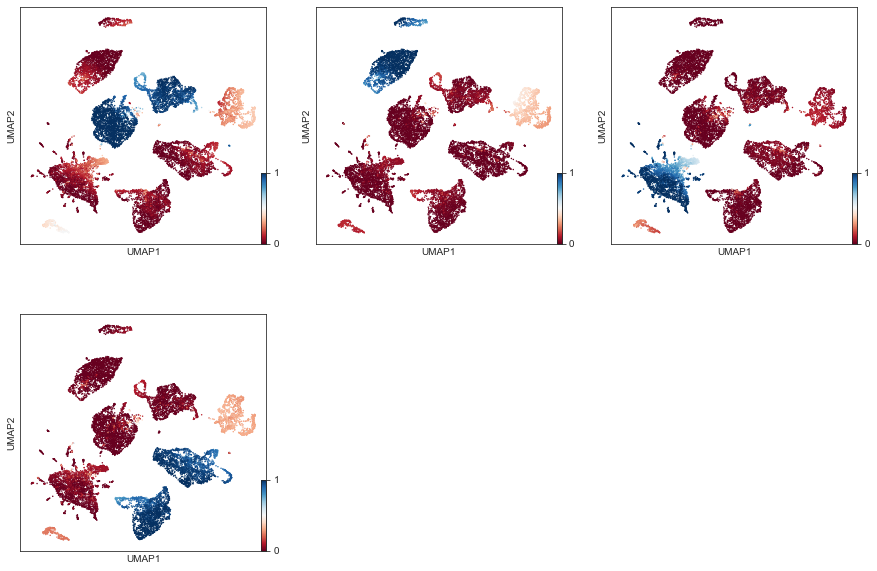

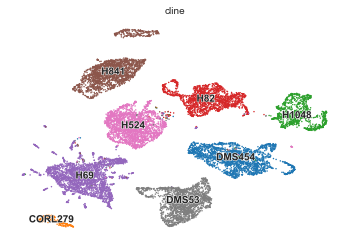

In [12]:
scv.pp.neighbors(X_magic)
scv.tl.umap(X_magic)
scv.pl.umap(X_magic, c = [S_matrix[i] for i in ['V1','V2','V3','V4']], components='1,2', show=False, figsize= (5,5),ncols = 3, frameon=True, cmap = 'RdBu')
scv.pl.umap(X_magic, c = 'cline')

In [13]:
X_magic.obsm['ParetoTI_S'] = S_matrix

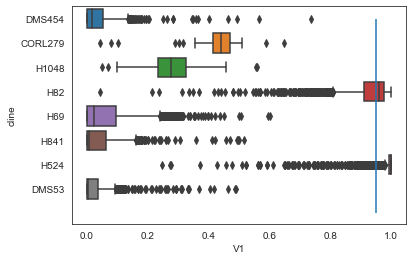

In [21]:
sns.boxplot(X_magic.obsm['ParetoTI_S']['V1'], X_magic.obs.cline)
plt.vlines(x = 0.95, ymin = 0, ymax = 8)

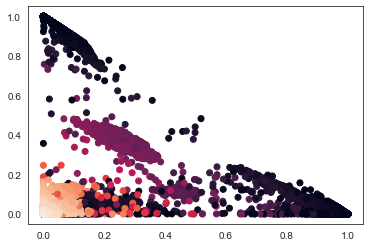

In [26]:
plt.scatter(X_magic.obsm['ParetoTI_S']['V1'],X_magic.obsm['ParetoTI_S']['V2'], c = X_magic.obsm['ParetoTI_S']['V4'])

In [19]:
tmp = X_magic.obsm['ParetoTI_S'].copy()

for arc in  X_magic.obsm['ParetoTI_S'].columns:
    closest = X_magic.obsm['ParetoTI_S'].loc[X_magic.obsm['ParetoTI_S'][arc].sort_values(ascending = False) > .95]
    tmp.loc[closest.index,'specialist'] = arc
X_magic.obs['specialists_ParetoTI_S'] = tmp.specialist
X_magic.obs['specialists_ParetoTI_S'].value_counts()

V1    3030
V4    2363
V3    1430
V2    1396
Name: specialists_ParetoTI_S, dtype: int64

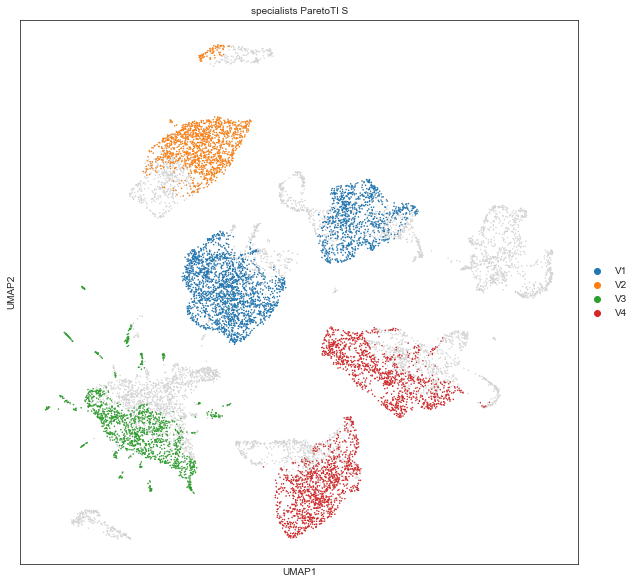

In [20]:
scv.pl.umap(X_magic, color = 'specialists_ParetoTI_S', figsize= (10,10), frameon=True, legend_loc = 'on right')


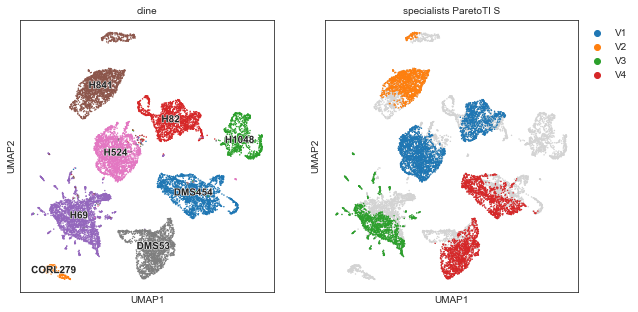

In [23]:
scv.pl.umap(X_magic, c = ['cline','specialists_ParetoTI_S'], components='1,2', figsize= (5,5), frameon=True, cmap = 'RdBu')


In [28]:
X_magic.obs = pd.merge(adata.obs.arc_aa_type,X_magic.obs, left_index=True, right_index=True)

In [30]:
X_magic.obs = pd.merge(adata.obs[[i for i in adata.obs if '_Score_pos' in i]],X_magic.obs, left_index=True, right_index=True)

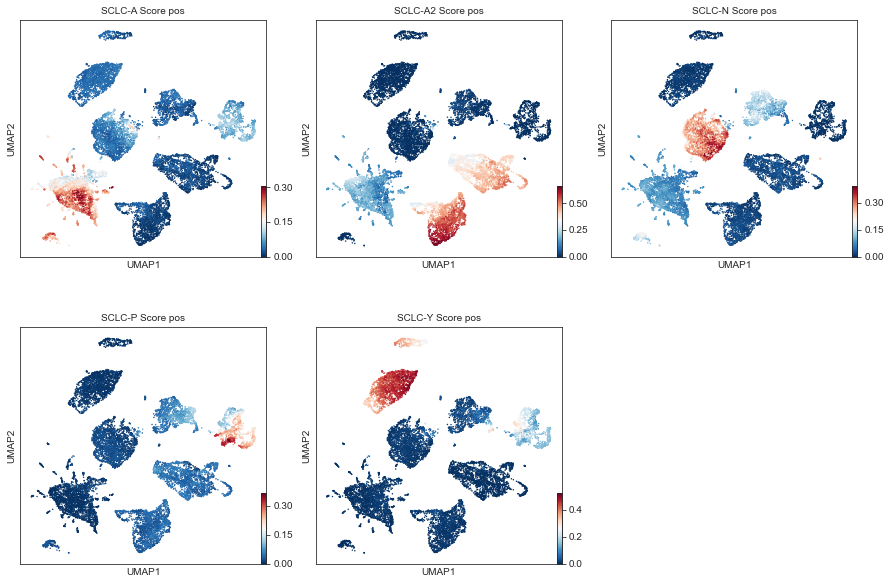

In [31]:
scv.pl.umap(X_magic, color = [i for i in adata.obs.columns if '_Score_pos' in i], legend_loc = 'on right', cmap='RdBu_r',
            figsize= (5,5), frameon=True,
            ncols = 3, smooth = True)

In [32]:
X_magic.obsm['ParetoTI_S'].columns = X_magic.obsm['ParetoTI_S'].columns.astype(str)


[<AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'S matrix score'}, xlabel='UMAP1', ylabel='UMAP2'>]

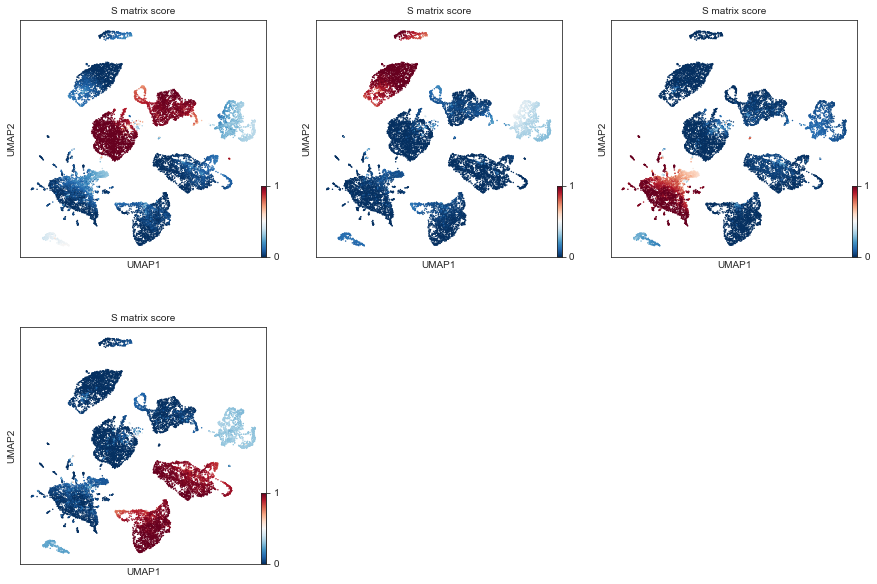

In [33]:
scv.pl.umap(X_magic, c = [X_magic.obsm['ParetoTI_S'][i] for i in X_magic.obsm['ParetoTI_S']], components='1,2', show=False, figsize= (5,5),ncols = 3, 
            title = 'S matrix score',
            frameon=True, cmap = 'RdBu_r')


In [34]:
adata.write_h5ad('../../out/cell-lines/adata_03b.h5ad')

In [35]:
X_magic.write_h5ad('../../out/cell-lines/X_magic_03b.h5ad')

## Enrichment of bulk archetype signatures

We want to follow the same pipeline as ParTI enrichment, so we need:
1. Distances to each archetype, to determine which bin to put cells into
2. Score for each cell that we want to test enrichment of (i.e. each signature score)
    1. We may want a cut-off of significance for the scores first (or a z score, for example), so that you can't get enrichment of insignificant scores
    2. For example, P may be "enriched" in one of the archetypes, but if the P score itself isn't significant, then its enrichment doesn't mean much.
3. We want to use  a Mann-Whitney test (with FDR corrected q < 0.1). We should split the data into 10 bins and test enrichment of the clsoest bin vs. the rest of the data. The closest bin should also be the maximum.

### By bins

In [324]:
from scipy.stats import mannwhitneyu
def mann_whitney_enrichment(distance, score,nbins =10):
    n_obs = distance.shape[0]
    bin_size = int(np.round(n_obs/nbins))
    mult = 1. / bin_size
    #for each column in distance, bin the samples and then do a Mann Whitney
    for d in distance.columns:
        print(d)
        dist_tmp = distance.sort_values(d).copy()
        dist_tmp['bin'] = [np.trunc(x * mult + mult) for x in range(len(dist_tmp) ) ]
        closest = list(dist_tmp.loc[dist_tmp.bin == 0].index)
        far = list(dist_tmp.loc[dist_tmp.bin != 0].index)
        score_tmp = score.loc[dist_tmp.index].copy()
        score_tmp['bin'] = dist_tmp.bin
        
        for s in score.columns:
            stat, p =mannwhitneyu(score.loc[closest, s], score.loc[far, s], alternative='greater')
            if p < 0.05:
                if score_tmp.groupby('bin').mean()[s].idxmax()==0:
                    sns.boxplot(data = score_tmp, x = 'bin', y = s)
                    plt.show()
                    print(p, s)
            
        
        

In [348]:
from scipy.stats import mannwhitneyu
def mann_whitney_enrichment_S(S, score,nbins =10):
    p_values = pd.DataFrame(columns = ['d','s','stat','p'])
    n_obs = S.shape[0]
    bin_size = int(np.round(n_obs/nbins))
    mult = 1. / bin_size
    #for each column in distance, bin the samples and then do a Mann Whitney
    for d in S.columns:
        print(d)
        S_tmp = S.sort_values(d, ascending=False).copy()
        S_tmp['bin'] = [np.trunc(x * mult + mult) for x in range(len(S_tmp) ) ]
        closest = list(S_tmp.loc[S_tmp.bin == 0].index)
        far = list(S_tmp.loc[S_tmp.bin != 0].index)
        score_tmp = score.loc[S_tmp.index].copy()
        score_tmp['bin'] = S_tmp.bin
        
        for s in score.columns:
            stat, p =mannwhitneyu(score.loc[closest, s], score.loc[far, s], alternative='greater')
            p_values = p_values.append({'d':d,'s':s,'stat':stat,'p':p}, ignore_index=True)
            if p < 0.05:
                if score_tmp.groupby('bin').mean()[s].idxmax()==0:
                    # sns.boxplot(data = score_tmp, x = 'bin', y = s)
                    # plt.show()
                    print(p, s)
    return p_values
            
        

In [350]:
score = X_magic.obs[[i for i in adata.obs if '_Score_pos' in i]]
distance = X_magic.obsm['ParetoTI_arc_distance']
S = X_magic.obsm['ParetoTI_S']
p_values = mann_whitney_enrichment_S(S, score, nbins = 10)

1
7.851319126654882e-116 SCLC-P_Score_pos
2
3
2.105328591762445e-14 SCLC-Y_Score_pos
4
2.3869864611264227e-43 SCLC-A_Score_pos
7.076329524234927e-154 SCLC-A2_Score_pos
3.131489127086353e-64 SCLC-N_Score_pos
5
4.807243092818321e-70 SCLC-A_Score_pos
1.4650563916018858e-28 SCLC-N_Score_pos
6
3.7050004683502604e-59 SCLC-A2_Score_pos
5.952059801356444e-84 SCLC-Y_Score_pos


In [353]:
from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(p_values.p, alpha=0.1, method='fdr_bh')
p_values['p_corr'] = pvals_corrected
p_values

,d,s,stat,p,p_corr
0,1,SCLC-A_Score_pos,11698663.0,2.543750e-22,7.631250e-22
1,1,SCLC-A2_Score_pos,7847239.0,1.000000e+00,1.000000e+00
2,1,SCLC-N_Score_pos,9201924.0,1.000000e+00,1.000000e+00
3,1,SCLC-P_Score_pos,13726814.0,7.851319e-116,1.177698e-114
4,1,SCLC-Y_Score_pos,13076568.0,2.466164e-74,1.849623e-73
5,2,SCLC-A_Score_pos,10115439.0,9.082896e-01,1.000000e+00
6,2,SCLC-A2_Score_pos,8822988.0,1.000000e+00,1.000000e+00
7,2,SCLC-N_Score_pos,10707566.5,2.040138e-03,4.708010e-03
8,2,SCLC-P_Score_pos,10328708.0,4.431659e-01,8.863318e-01
9,2,SCLC-Y_Score_pos,6417752.5,1.000000e+00,1.000000e+00


### By specialists vs non-specialists

Instead of binning data, just compare archetype specialists as defined by `specialists_pca_diffdist_ParetoTI` to the rest of the cells and see if there is significant enrichment.

In [418]:
# def mann_whitney_enrichment_specialists(adata,score, arc_label ='specialists_ParetoTI_S'):
   
#     for cat in adata.obs[arc_label].cat.categories:
#         print(cat)
#         closest = list(adata[adata.obs[arc_label] == cat].obs_names)
#         far =list(adata[adata.obs[arc_label] == cat].obs_names)
#         score_tmp = score.loc[adata.obs_names].copy()
#         score_tmp['close'] = list((adata.obs[arc_label] == cat).values)
        
#         for s in score.columns:
#             stat, p =mannwhitneyu(score.loc[closest, s], score.loc[far, s])
#             print(p)

#             if (cat == '5') & (s == 'SCLC-A_Score_pos'):
#                 sns.kdeplot(data=score_tmp, x = s, hue='close', common_norm=True)
#                 plt.show()
#                 sns.boxplot(data = score_tmp, x = 'close', y = s)
#                 plt.show()
#             if p < 0.05:
#                 if score_tmp.groupby('bin').mean()[s].idxmax()==0:
#                     print(p, s)
            

In [559]:
# mann_whitney_enrichment_specialists(X_magic,score)

### By specialists (permutation test)

In [80]:
score.isna().sum().sum()


310

In [89]:
import random
from scipy.stats import percentileofscore as POS
def permutation_enrichment_test(adata,score, arc_label ='specialists_ParetoTI_S', n_permutations = 1000, plot = True, stat = 'median', verbose = True):
    score_tmp = score.copy()
    if score_tmp.isna().sum().sum() > 0: print("Warning: you have NAs in your score matrix. Ignoring NAs for calculation of statistic.")
    score_tmp['spec'] = adata.obs[arc_label]
    mean_by_arc = score_tmp.groupby('spec').mean().idxmax(axis = 1)
    p_values = pd.DataFrame(columns=score.columns, index=adata.obs[arc_label].cat.categories)
    for cat in adata.obs[arc_label].cat.categories:
        print(f"Archetype: {cat}")
        closest = list(adata[adata.obs[arc_label] == cat].obs_names)
        far =list(adata[adata.obs[arc_label] != cat].obs_names)
        if verbose:
            print(f"Bulk archetype with highest average score at archetype {cat}: {mean_by_arc[cat]}") 

        for s in score.columns:
            median_specialists = score.loc[closest, s].median(skipna = True)
            median_non = score.loc[far,s].median(skipna = True)
            mean_specialists = score.loc[closest, s].mean(skipna = True)
            mean_non = score.loc[far,s].mean(skipna = True)
            random_medians = []
            for r in range(n_permutations):
                random_cells =random.choices(score.loc[far, s], k=len(closest))
                # print(np.median(random.choices(score.loc[far, s], k=len(closest))))
                if stat == 'median':
                    random_medians.append(np.nanmedian(random_cells))
                elif stat == 'mean':
                    random_medians.append(np.nanmean(random_cells))
            if plot:
                sns.distplot(random_medians, color = 'orange', rug = True, hist =False)
                
                plt.ymin =np.max([plt.ymin,0])
                if stat == 'median':
                    plt.vlines(x = median_specialists, ymin = plt.ylim()[0], ymax = plt.ylim()[1], colors='k')
                elif stat == 'mean':
                    plt.vlines(x = mean_specialists, ymin = plt.ylim()[0], ymax = plt.ylim()[1], colors='k')

                plt.title(f"{s} enrichment at {cat}")
                plt.show()
            # sns.kdeplot(score.loc[closest, s], color = 'red')
            # sns.kdeplot(score.loc[far, s], color = 'blue')
            # plt.show()
            
            if stat == 'median':
                p_val =1- POS(random_medians, median_specialists)/100

            elif stat == 'mean':
                p_val=1- POS(random_medians, mean_specialists)/100
            print(f"\t p-value for {s}: {p_val}")
            p_values.loc[cat, s] = p_val
            
            if verbose:
                print(f"\t Fold change in mean for {s}: {mean_specialists/mean_non}")
    return p_values
    

            

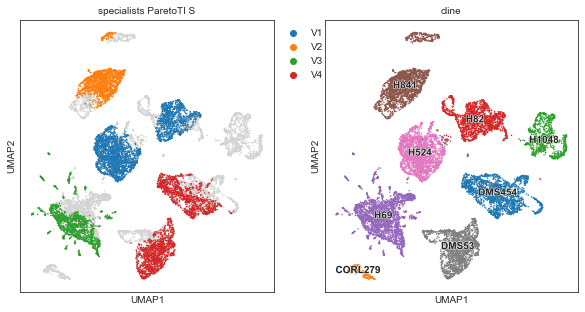

In [37]:
scv.pl.umap(X_magic, c = ['specialists_ParetoTI_S','cline'], components='1,2', figsize= (5,5), frameon=True, cmap = 'RdBu')


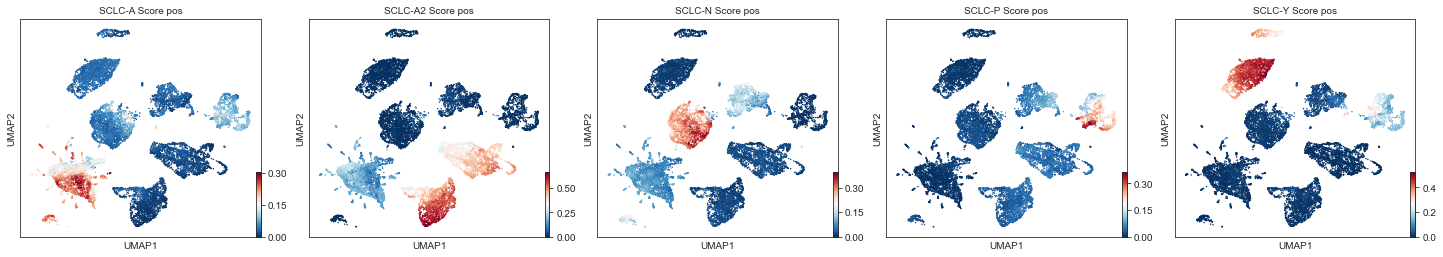

In [38]:
scv.pl.umap(X_magic, color = [i for i in adata.obs.columns if '_Score_pos' in i], legend_loc = 'on right', cmap='RdBu_r',
            figsize= (5,4), frameon=True,
            ncols = 5, smooth = True)

Archetype: V1
Bulk archetype with highest average score at archetype V1: SCLC-N_Score_pos


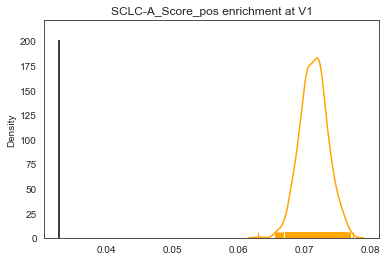

	 p-value for SCLC-A_Score_pos: 1.0
	 Fold change in mean for SCLC-A_Score_pos: 0.4598234748571678


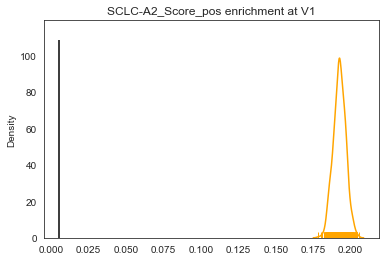

	 p-value for SCLC-A2_Score_pos: 1.0
	 Fold change in mean for SCLC-A2_Score_pos: 0.027747830584643002


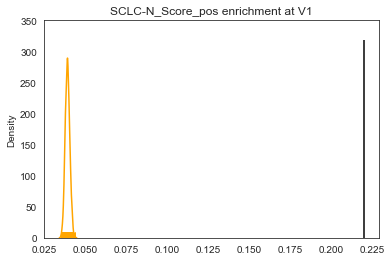

	 p-value for SCLC-N_Score_pos: 0.0
	 Fold change in mean for SCLC-N_Score_pos: 5.638358716087126


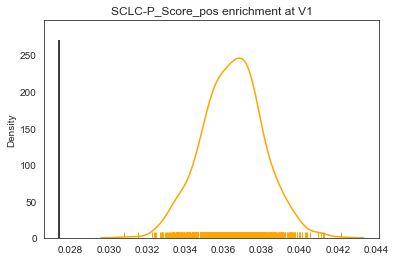

	 p-value for SCLC-P_Score_pos: 1.0
	 Fold change in mean for SCLC-P_Score_pos: 0.7517439995004024


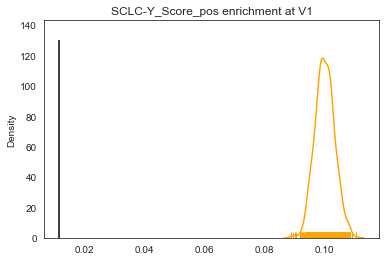

	 p-value for SCLC-Y_Score_pos: 1.0
	 Fold change in mean for SCLC-Y_Score_pos: 0.11556070906130224
Archetype: V2
Bulk archetype with highest average score at archetype V2: SCLC-Y_Score_pos


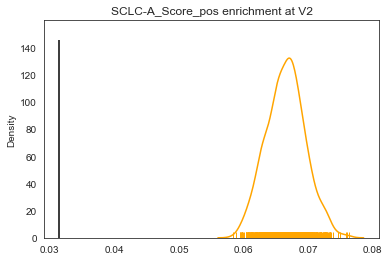

	 p-value for SCLC-A_Score_pos: 1.0
	 Fold change in mean for SCLC-A_Score_pos: 0.472976832293815


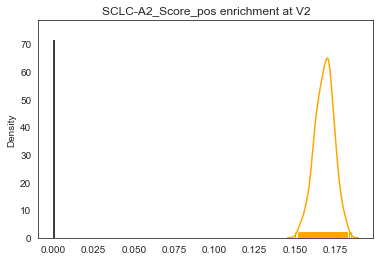

	 p-value for SCLC-A2_Score_pos: 1.0
	 Fold change in mean for SCLC-A2_Score_pos: 0.0007181553149997391


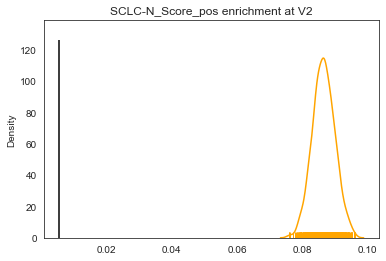

	 p-value for SCLC-N_Score_pos: 1.0
	 Fold change in mean for SCLC-N_Score_pos: 0.06381297496322036


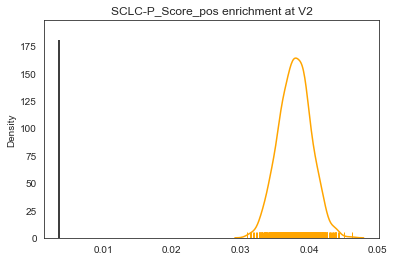

	 p-value for SCLC-P_Score_pos: 1.0
	 Fold change in mean for SCLC-P_Score_pos: 0.09490534033023178


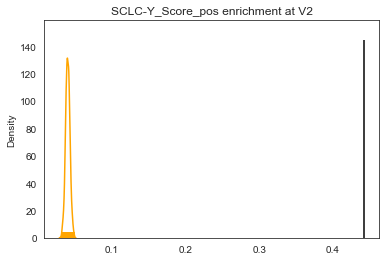

	 p-value for SCLC-Y_Score_pos: 0.0
	 Fold change in mean for SCLC-Y_Score_pos: 10.830912116729944
Archetype: V3
Bulk archetype with highest average score at archetype V3: SCLC-A_Score_pos


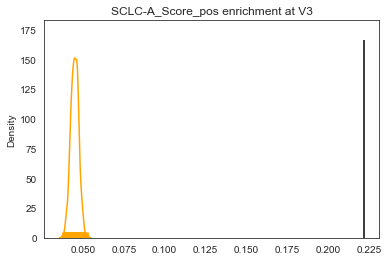

	 p-value for SCLC-A_Score_pos: 0.0
	 Fold change in mean for SCLC-A_Score_pos: 4.942403916818313


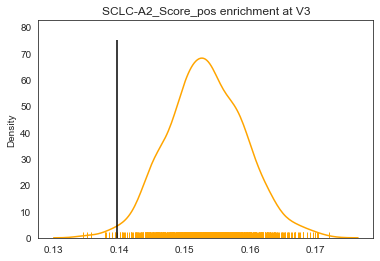

	 p-value for SCLC-A2_Score_pos: 0.989
	 Fold change in mean for SCLC-A2_Score_pos: 0.9115064132500678


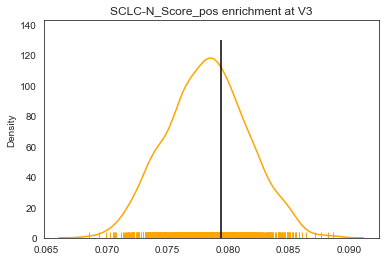

	 p-value for SCLC-N_Score_pos: 0.364
	 Fold change in mean for SCLC-N_Score_pos: 1.0154863471711963


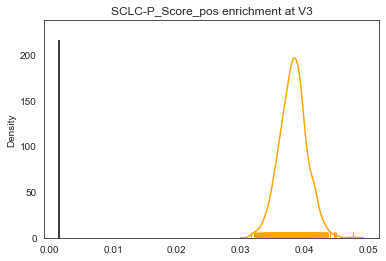

	 p-value for SCLC-P_Score_pos: 1.0
	 Fold change in mean for SCLC-P_Score_pos: 0.04211536339550041


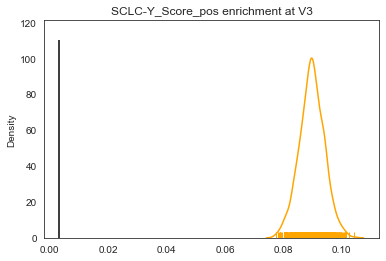

	 p-value for SCLC-Y_Score_pos: 1.0
	 Fold change in mean for SCLC-Y_Score_pos: 0.03614269747961048
Archetype: V4
Bulk archetype with highest average score at archetype V4: SCLC-A2_Score_pos


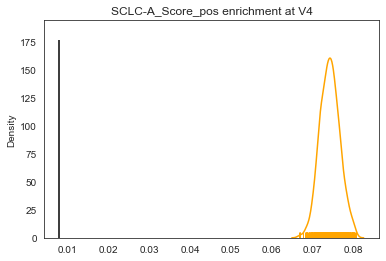

	 p-value for SCLC-A_Score_pos: 1.0
	 Fold change in mean for SCLC-A_Score_pos: 0.10652047477904515


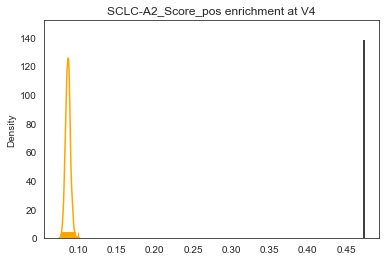

	 p-value for SCLC-A2_Score_pos: 0.0
	 Fold change in mean for SCLC-A2_Score_pos: 5.475169822523615


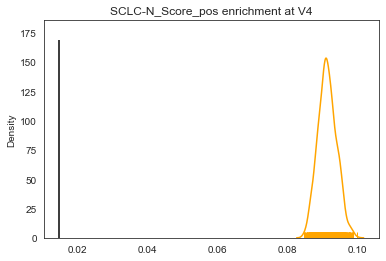

	 p-value for SCLC-N_Score_pos: 1.0
	 Fold change in mean for SCLC-N_Score_pos: 0.1612573056405238


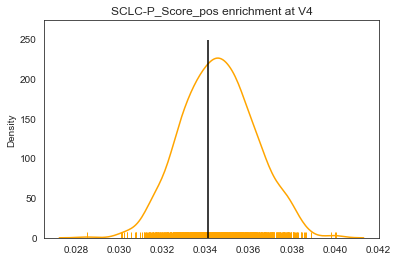

	 p-value for SCLC-P_Score_pos: 0.61
	 Fold change in mean for SCLC-P_Score_pos: 0.9865476845823903


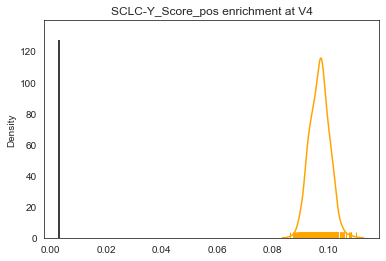

	 p-value for SCLC-Y_Score_pos: 1.0
	 Fold change in mean for SCLC-Y_Score_pos: 0.0320447431508855


In [101]:
score = X_magic.obs[[i for i in adata.obs if '_Score_pos' in i]]
score = score.fillna(0)
p_values = permutation_enrichment_test(X_magic, score, n_permutations=1000, plot = True, stat = 'mean', verbose = True)

In [96]:
p_values

,SCLC-A_Score_pos,SCLC-A2_Score_pos,SCLC-N_Score_pos,SCLC-P_Score_pos,SCLC-Y_Score_pos
V1,1.0,1.0,0.0,1.0,1.0
V2,1.0,1.0,1.0,1.0,0.0
V3,0.0,0.99,0.31,1.0,1.0
V4,1.0,0.0,1.0,0.66,1.0


Archetype: V1


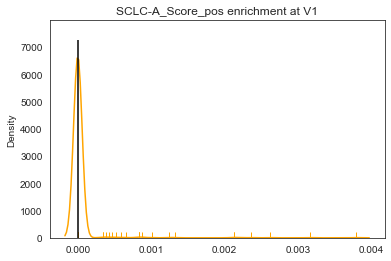

	 p-value for SCLC-A_Score_pos: 0.51


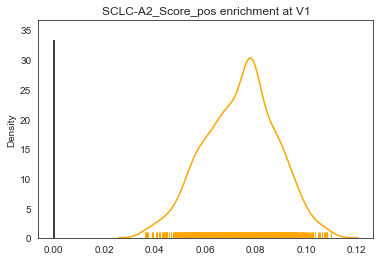

	 p-value for SCLC-A2_Score_pos: 1.0


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


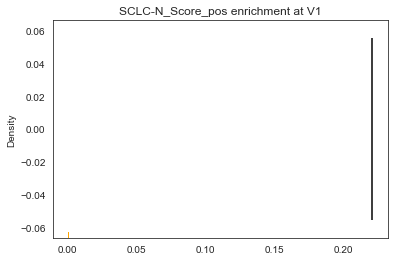

	 p-value for SCLC-N_Score_pos: 0.0


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


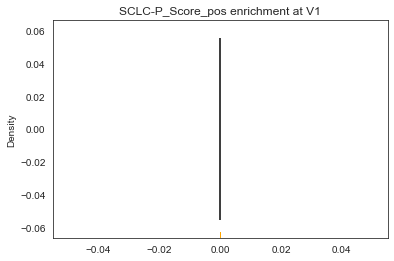

	 p-value for SCLC-P_Score_pos: 0.49950000000000006


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


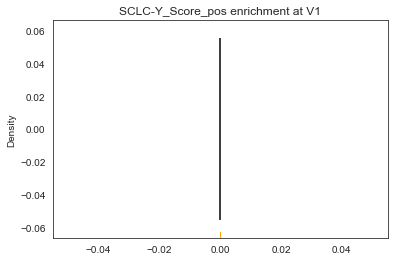

	 p-value for SCLC-Y_Score_pos: 0.49950000000000006
Archetype: V2


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


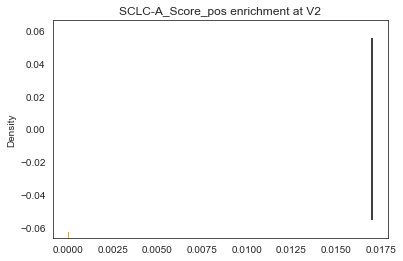

	 p-value for SCLC-A_Score_pos: 0.0


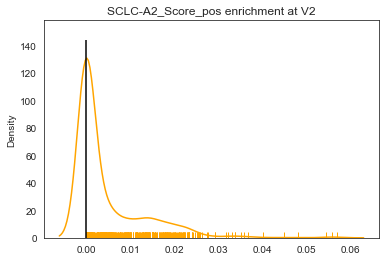

	 p-value for SCLC-A2_Score_pos: 0.706


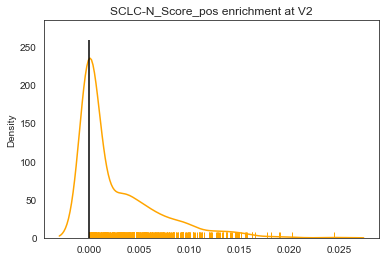

	 p-value for SCLC-N_Score_pos: 0.754


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


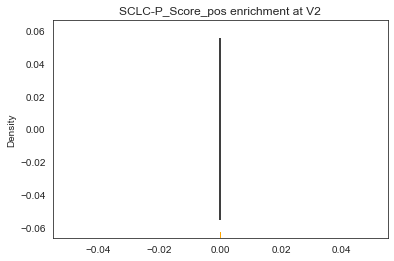

	 p-value for SCLC-P_Score_pos: 0.49950000000000006


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


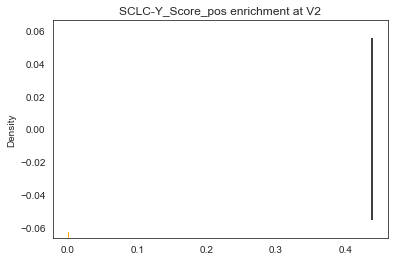

	 p-value for SCLC-Y_Score_pos: 0.0
Archetype: V3


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


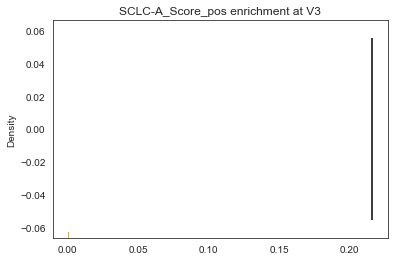

	 p-value for SCLC-A_Score_pos: 0.0


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


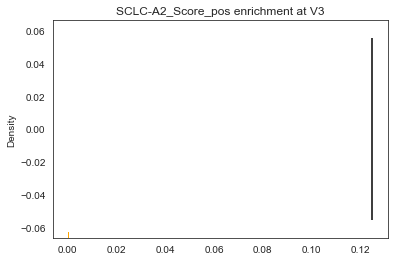

	 p-value for SCLC-A2_Score_pos: 0.0


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


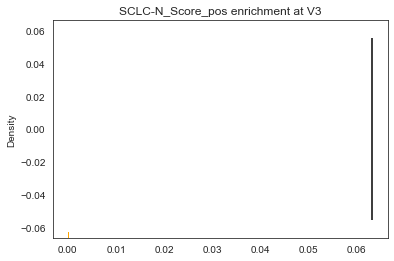

	 p-value for SCLC-N_Score_pos: 0.0


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


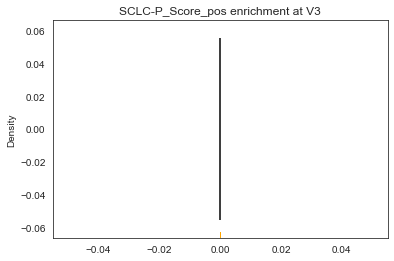

	 p-value for SCLC-P_Score_pos: 0.49950000000000006


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


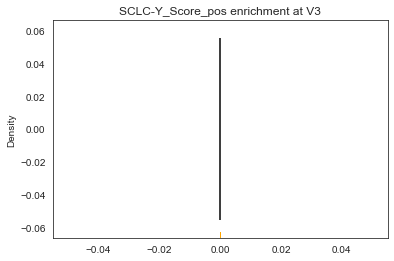

	 p-value for SCLC-Y_Score_pos: 0.49950000000000006
Archetype: V4


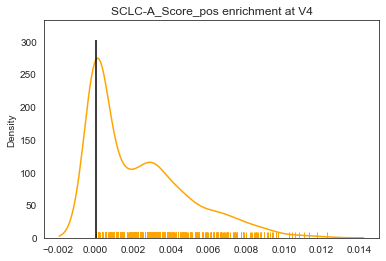

	 p-value for SCLC-A_Score_pos: 0.817


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


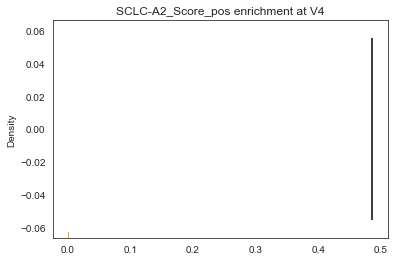

	 p-value for SCLC-A2_Score_pos: 0.0


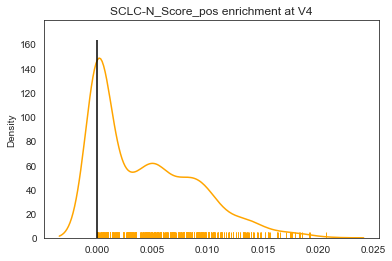

	 p-value for SCLC-N_Score_pos: 0.8305


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


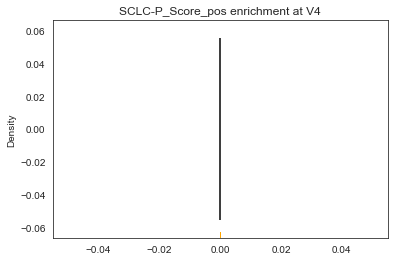

	 p-value for SCLC-P_Score_pos: 0.49950000000000006


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


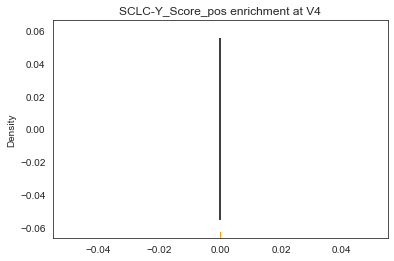

	 p-value for SCLC-Y_Score_pos: 0.49950000000000006


In [102]:
p_values = permutation_enrichment_test(X_magic, score, plot = True, stat = 'median', verbose = False)

In [103]:
p_values

,SCLC-A_Score_pos,SCLC-A2_Score_pos,SCLC-N_Score_pos,SCLC-P_Score_pos,SCLC-Y_Score_pos
V1,0.51,1.0,0.0,0.4995,0.4995
V2,0.0,0.706,0.754,0.4995,0.0
V3,0.0,0.0,0.0,0.4995,0.4995
V4,0.817,0.0,0.8305,0.4995,0.4995


We consider significant ones that are significant for both mean and median (since non-normal distributions have long tails that will pull on the mean)

In [104]:
indir = "../../../data/single-cell-rna-seq/Human-cell-lines/"

samples =["2637-1-DMS454","2637-2-CORL279","2637-3-H1048","2638-1-H82","2638-2-H69","2638-4-H841","2639-1-H524","2639-2-DMS53"]
[a1,a2,a3,a4,a5,a6,a7, a8] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [105]:
adatas = [a1,a2,a3,a4,a5,a6,a7, a8] 
a1 = adatas.pop(0)
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'
adata = a1.concatenate(adatas, batch_key=batch_key, batch_categories=batch_categories)